Read context decoder results (xlsx files, output from `decode_context.py`). Plot decoder (i.e. classification) accuracy and check the decoder weight.

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statannotations.Annotator import Annotator
plt.style.use('figure.mplstyle')

import function.utils as ut

In [26]:
# %% Setup
excelfiles = [r'C:\Users\Hung-Ling\Desktop\MC_Results\New Results\Context decoder enriched.xlsx',
              r'C:\Users\Hung-Ling\Desktop\MC_Results\New Results\Context decoder dissimilar.xlsx',
              r'C:\Users\Hung-Ling\Desktop\MC_Results\New Results\Context decoder similar.xlsx']
cellsprop = r'C:\Users\Hung-Ling\Desktop\MC_Results\New Results\Cells property.xlsx'
exps = ['Enriched','Dissimilar','Similar']
n_mice_list = [4,3,8]
colors = ['tab:red','tab:blue','tab:green']
palettes = [['tab:red','gray'],
            ['tab:blue','gray'],
            ['tab:green','gray']]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Original vs. 2_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:6.500e-08 U_stat=2.640e+03
1_Original vs. 1_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:2.436e-11 U_stat=2.760e+03
3_Original vs. 3_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:1.310e-07 U_stat=1.220e+03
4_Original vs. 4_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:2.705e-06 U_stat=1.180e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Original vs. 2_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:1.358e-09 U_stat=2.700e+03
1_Original vs. 1_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:4.142e-04 U_stat=2.310e+03
3_Original vs. 3_Shuffled: Mann-Whitney-Wilcoxon test greater, P_val:3.621e-05 U_stat=2.340e+03
p-value annotation legend:
      ns:

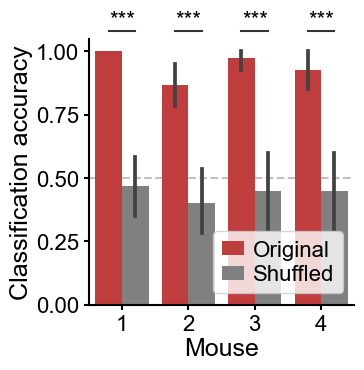

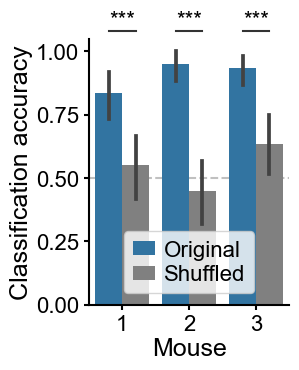

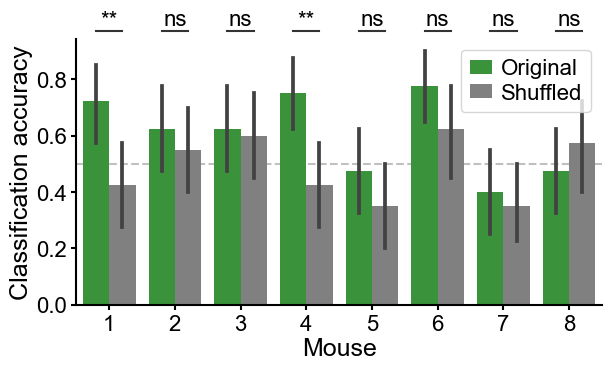

In [27]:
# %% Decoder accuracy for each mouse
def plot_accuracy(excelfile, n_mice, palette):
    
    accuracy_mice = []
    for m in range(n_mice):
        A = pd.read_excel(excelfile, sheet_name=str(m+1))
        accuracy_mice.append([A['Original'].to_numpy(),
                              A['Shuffle context'].to_numpy()])  # 'Shuffle position'
    
    fig, ax = plt.subplots(figsize=(1.2+n_mice*0.65,4))
    fig, ax = ut.compare_grouped(
        accuracy_mice, varnames=['Mouse','Data','Accuracy'], fig=fig, ax=ax,
        varvalues=(np.arange(n_mice)+1,['Original','Shuffled'],None), kind='bar',
        palette=palette, test='Mann-Whitney-gt')
    ax.axhline(0.5, c='silver', ls='--', zorder=-1)
    
    return fig, ax

for p, excelfile in enumerate(excelfiles):        
    fig, ax = plot_accuracy(excelfile, n_mice_list[p], palettes[p])
    ax.set_ylabel('Classification accuracy')
    # fig.savefig('Decode context '+exps[p]+'.svg')

In [28]:
## Get data
accuracy_list = []
for p, n_mice in enumerate(n_mice_list):
    accuracy = []
    for m in range(n_mice):
        A = pd.read_excel(excelfiles[p], sheet_name=str(m+1))
        accuracy.append(A['Original'].to_numpy())
    accuracy_list.append(accuracy)

----------Enriched----------
Mouse 1: binomial test p=8.674e-19
Mouse 2: binomial test p=2.603e-09
Mouse 3: binomial test p=3.729e-11
Mouse 4: binomial test p=9.733e-09
----------Dissimilar----------
Mouse 1: binomial test p=8.082e-08
Mouse 2: binomial test p=3.127e-14
Mouse 3: binomial test p=4.542e-13
----------Similar----------
Mouse 1: binomial test p=0.003213
Mouse 2: binomial test p=0.07693
Mouse 3: binomial test p=0.07693
Mouse 4: binomial test p=0.001111
Mouse 5: binomial test p=0.6821
Mouse 6: binomial test p=0.0003398
Mouse 7: binomial test p=0.9231
Mouse 8: binomial test p=0.6821


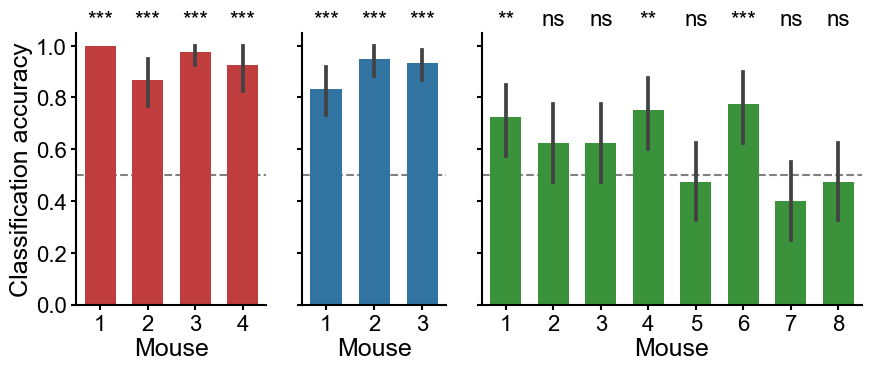

In [29]:
## Plot classification accuracy for all experiments and perform binomial test against 0.5
def plot_accuracy_bis(accuracy_list, exps, colors):
    
    n_exp = len(accuracy_list)
    fig, axs = plt.subplots(1,n_exp, figsize=(9,4), sharey=True,
                            gridspec_kw={'width_ratios':[25,19,50]})
    
    for p in range(n_exp):
        print('-'*10 + exps[p] + '-'*10)
        N = n_mice_list[p]
        for m in range(N):
            accuracy = accuracy_list[p][m]  # 0,1,... 
            result = stats.binomtest(np.sum(accuracy), n=len(accuracy), p=0.5, alternative='greater') 
            print(f'Mouse {m+1}: binomial test p={result.pvalue:.4g}')
            if result.pvalue < 0.001:
                axs[p].text(m,1.08,'***', ha='center')
            elif result.pvalue < 0.01:
                axs[p].text(m,1.08,'**', ha='center')
            elif result.pvalue < 0.05:
                axs[p].text(m,1.08,'*', ha='center')
            else:
                axs[p].text(m,1.08,'ns', ha='center')
        sns.barplot(accuracy_list[p], errorbar=('ci',95), width=0.65, color=colors[p], ax=axs[p])
        axs[p].axhline(0.5, c='gray', ls='--', zorder=-1)
        axs[p].set(xlabel='Mouse', xticks=range(N), xticklabels=range(1,N+1))
        
    axs[0].set(ylabel='Classification accuracy')
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.15)
    
    return fig, axs

fig, axs = plot_accuracy_bis(accuracy_list, exps, colors)
# fig.savefig('Decode context.svg')

t-test for accuracy not greater than 0.5: p=0.0003
t-test for accuracy not greater than 0.5: p=0.0040
t-test for accuracy not greater than 0.5: p=0.0360
----------------
One-way ANOVA test: p=0.0006
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Enriched vs. Dissimilar: Custom statistical test, P_val:9.120e-01
Dissimilar vs. Similar: Custom statistical test, P_val:6.187e-03
Enriched vs. Similar: Custom statistical test, P_val:1.259e-03


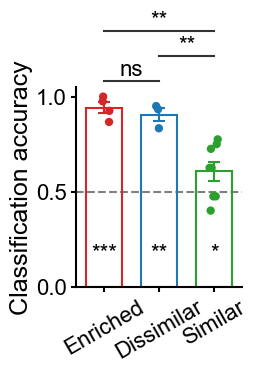

In [31]:
def plot_summary(excelfiles, n_mice_list, exps=['Enriched','Dissimilar','Similar'], 
                 colors=['tab:red','tab:blue','tab:green']):

    fsize = plt.rcParams['font.size']
    lwidth = plt.rcParams['axes.linewidth']

    accuracy = [[] for _ in range(len(exps))]
    experiment = []
    for p, excelfile in enumerate(excelfiles):
        n_mice = n_mice_list[p]
        for m in range(n_mice):
            A = pd.read_excel(excelfile, sheet_name=str(m+1))
            accuracy[p].append(np.mean(A['Original']))
        experiment.append([exps[p]]*n_mice)
    
    df = pd.DataFrame({'Accuracy': np.hstack(accuracy),
                       'Experiment': np.hstack(experiment)})
    
    width = 0.65  # Bar width
    ypos = 0.15  # y position to place the statistical annotations
    fig, ax = plt.subplots(figsize=(2.8,4.4))
    ax.axhline(0.5, ls='--', c='gray', zorder=-1)
    
    for p, exp in enumerate(exps):
        height = np.mean(accuracy[p])
        yerr = stats.sem(accuracy[p])
        ax.bar(p, height, yerr=yerr, width=width, color='none', linewidth=lwidth, 
               edgecolor=colors[p], ecolor=colors[p], capsize=4,
               error_kw=dict(elinewidth=lwidth, capthick=lwidth))
        pval = stats.ttest_1samp(accuracy[p], 0.5, alternative='greater')[1]
        print(f't-test for accuracy not greater than 0.5: p={pval:.4f}')
        if pval < 0.001:
            ax.text(p, ypos, '***', ha='center')
        elif pval < 0.01:
            ax.text(p, ypos, '**', ha='center')
        elif pval < 0.05:
            ax.text(p, ypos, '*', ha='center')
        else:
            ax.text(p, ypos, 'ns', ha='center')
    
    sns.stripplot(data=df, x='Experiment', y='Accuracy', hue='Experiment', palette=colors, ax=ax, size=6, jitter=0.1)
    
    ## Multiple comparison
    print('-'*16)
    print('One-way ANOVA test: p=%.4f' % stats.f_oneway(*accuracy)[1])
    pairs, pvalues = [], []
    post_hocs = stats.tukey_hsd(*accuracy)
    for u, v in zip([0,0,1],[1,2,2]):
        pairs.append([exps[u], exps[v]])
        pvalues.append(post_hocs.pvalue[u,v])
    
    pformat = {'pvalue_thresholds':[[1e-3,'***'],[1e-2,'**'],[0.05,'*'],[1,'ns']], 'fontsize':fsize}
    annot = Annotator(ax, pairs, data=df, x='Experiment', y='Accuracy')
    annot.configure(test=None, loc='outside', line_width=lwidth, line_height=0., pvalue_format=pformat)
    annot.set_pvalues(pvalues)
    annot.annotate()
    return fig, ax

fig, ax = plot_summary(excelfiles, n_mice_list, exps=exps, colors=colors)
ax.set(ylabel='Classification accuracy', xlabel='', xticks=range(len(exps)))
ax.set_xticklabels(exps, rotation=30)
ax.get_legend().remove()
fig.tight_layout()
# fig.savefig('Decoder accuracy.svg')

In [6]:
# %% Explore weight correlation
def plot_corr_map(excelfile, cellsprop, exp='Enriched', color='C0', active=False,
                  fig=None, ax=None):
    
    decoder = pd.read_excel(excelfile, sheet_name='Weight')
    cells = pd.read_excel(cellsprop, sheet_name=exp)
    sub = cells['Active'] if active else np.ones(cells.shape[0], dtype=bool)
    
    df = pd.DataFrame({
        'Activity': 60*(cells['Trate F'][sub] + cells['Trate N'][sub]),
        'Activity diff': 60*np.abs(cells['Trate N'][sub] - cells['Trate F'][sub]),
        # 'Activity': cells['Tauc F'][sub] + cells['Tauc N'][sub],
        # 'Activity diff': np.abs(cells['Tauc N'][sub] - cells['Tauc F'][sub]),
        'SI': cells['SI F'][sub] + cells['SI N'][sub],
        'Reliability': cells['Reliability F'][sub] + cells['Reliability N'][sub],
        'Discrimination': cells['Discrimination'][sub],  # 1-fn
        'Remapping': cells['Remapping'][sub],  ## ff-fn
        'Importance': np.abs(decoder['Weight'][sub])})
    
    if fig is None:
        fig = plt.figure()
    if ax is None:
        ax = plt.gca()
        
    img = ax.imshow(df.corr(method='pearson'), cmap='coolwarm', vmin=-0.9, vmax=0.9)
    ax.set(xticks=np.arange(7), yticks=np.arange(7), xticklabels=[], yticklabels=[])
    fig.colorbar(img, ax=ax)
    
    return fig, ax

def plot_scatter(excelfile, cellsprop, exp='Enriched', color='C0', active=False,
                 fig=None, ax=None):
    
    decoder = pd.read_excel(excelfile, sheet_name='Weight')
    cells = pd.read_excel(cellsprop, sheet_name=exp)
    sub = cells['Active'] if active else np.ones(cells.shape[0], dtype=bool)
        
    df = pd.DataFrame({
        'Activity diff': 60*(cells['Trate N'][sub] - cells['Trate F'][sub]),
        'Weight': decoder['Weight'][sub]})
    
    if fig is None:
        fig = plt.figure()
    if ax is None:
        ax = plt.gca()
        
    sns.regplot(data=df, x='Weight', y='Activity diff', ax=ax, color=color, scatter_kws={'s':14})
    ax.set(xlabel='Decoder weight',
           ylabel='Activity difference\n(transient/min)')
    
    x = decoder['Weight'][sub].to_numpy()
    y = 60*(cells['Trate N'][sub] - cells['Trate F'][sub]).to_numpy()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'Slope: {slope:.6g}')
    print(f'Intercept: {intercept:.6g}')
    print(f'R-squared: {r_value**2:.6g}')
    print(f'r-value: {r_value:.6g}')
    print(f'p-value: {p_value:.6g}')
    print('-'*32)
    
    return fig, ax

Slope: 0.918062
Intercept: 0.0576993
R-squared: 0.690918
r-value: 0.831215
p-value: 1.2405e-52
--------------------------------


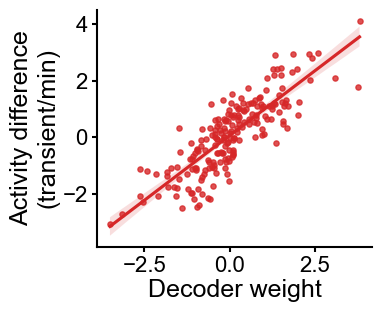

In [7]:
p = 0
fig, ax = plt.subplots(figsize=(4.1,3.4))
fig, ax = plot_scatter(excelfiles[p], cellsprop, exp=exps[p], color=colors[p], active=True, fig=fig, ax=ax)
fig.tight_layout()
fig.savefig('Weight correlation enriched.svg')

Slope: 1.35195
Intercept: -0.33805
R-squared: 0.669769
r-value: 0.818394
p-value: 4.23017e-24
--------------------------------
Slope: 0.607647
Intercept: -0.102737
R-squared: 0.457546
r-value: 0.676422
p-value: 6.17015e-39
--------------------------------


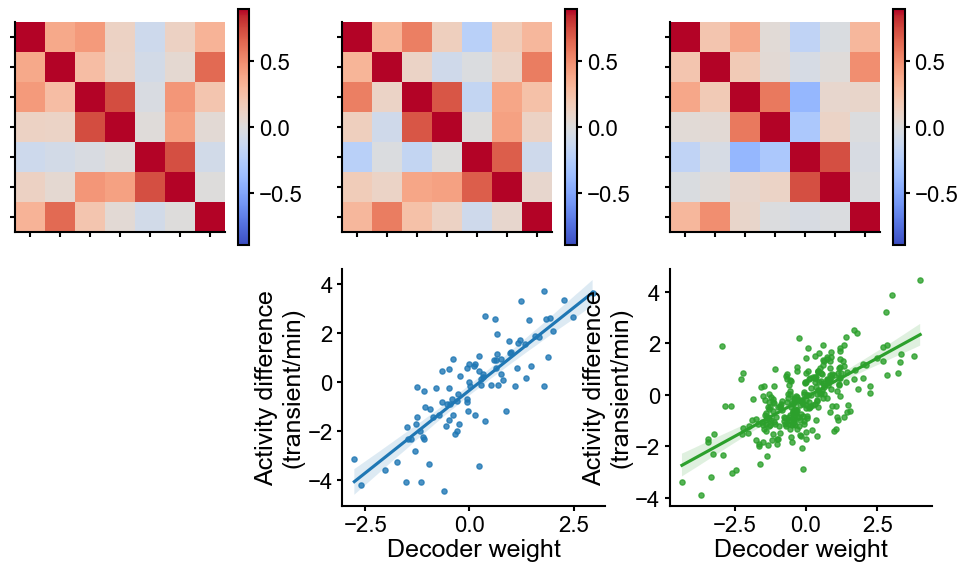

In [8]:
fig, axs = plt.subplots(2,3,figsize=(10,6))    
for p in range(len(excelfiles)):
    plot_corr_map(excelfiles[p], cellsprop, exp=exps[p], color=colors[p], active=True,
                  fig=fig, ax=axs[0,p])
    if p != 0:
        plot_scatter(excelfiles[p], cellsprop, exp=exps[p], color=colors[p], active=True,
                     fig=fig, ax=axs[1,p])
axs[1,0].axis('off')
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
fig.savefig('Weight correlation.svg')

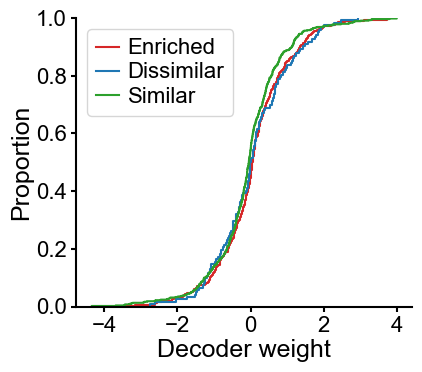

In [5]:
# %% Culmulative plot of decoder weights
def plot_decoder_weight(excelfiles, exps=['Enriched','Dissimilar','Similar'],
                        colors=['C3','C0','C2']):
    
    fig, ax = plt.subplots(figsize=(4.5,4))
    
    for p in range(len(exps)):
        df = pd.read_excel(excelfiles[p], sheet_name='Weight')
        weight = df['Weight'].to_numpy()
        sns.ecdfplot(weight, color=colors[p])
        
    ax.set(xlabel='Decoder weight')
    ax.legend(exps)
    fig.tight_layout()
        
plot_decoder_weight(excelfiles)